<h1 style="text-align:center; color:#619DBF; font-weight:bold;">Flight Price Prediction ✈️</h1>


<h3 style="color:#007EA6">By (Mennatullah Elsahy)</h3>


- [Dataset Description](#1)
- [Research Questions](#5)
- [Import Libraries and customizing styles](#2)
- [Data preparation & EDA](#3)
- [Conclusions](#4)

<a id=1></a>
<h1 style="color:#619DBF">Dataset Description</h1>

## [Dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/code)

**it contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are `300261` datapoints and `11` features in the cleaned dataset.**

<h3 style="color:#296EAA">FEATURES</h3>


**`1) Airline:`** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

**`2) Flight:`** Flight stores information regarding the plane's flight code. It is a categorical feature.

**`3) Source City:`** City from which the flight takes off. It is a categorical feature having 6 unique cities.

**`4) Departure Time:`** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

**`5) Stops:`** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

**`6) Arrival Time:`** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

**`7) Destination City:`** City where the flight will land. It is a categorical feature having 6 unique cities.

**`8) Class:`** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

**`9) Duration:`** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

**`10)Days Left:`** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

**`11) Price:`** Target variable stores information of the ticket price.




<a id=5></a>
<h1 style="color:#619DBF">Research Questions</h1>

**The aim of our study is to answer the below research questions:**

### Does price vary with Airlines?
### How is the price affected when tickets are bought in just 1 or 2 days before departure?
### How does the price change depending on the departure time?
### How does the price change depending on the arrival time?
### Does ticket price change based on the departure time and arrival time?
### How does the price change depending on the Source City?
### How does the ticket price change depending on the passenger class?
### How does the ticket price change depending on Stops?


<a id=2></a>
<h1 style="color:#619DBF">Import Libraries and customizing styles</h1>


In [1]:
# Importing libraries
import pandas as pd # for dataframe
import numpy as np  # for arraies
# for visualization
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# Setting up default plot parameters
sns.color_palette('Set2')  # Set default color palette for Seaborn
plt.style.use('ggplot')    # Set plot style to 'ggplot'

params = {
    'figure.figsize': (8, 5),
    'axes.titlesize': 20,
    'font.size': 12,
    'axes.linewidth': 1,
}

# Update the default parameters for Matplotlib
matplotlib.rcParams.update(params)

# Define parameters for creating a rounded rectangular bounding box around text in plots
bbox = {
    'boxstyle': 'round',
    'pad': 0.5,
    'facecolor': 'white',
    'edgecolor': 'black',
    'linewidth': 1.5,
    'alpha': 1,
}


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<a id=3></a>
<h1 style="color:#619DBF">Data preparation & EDA</h1>

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


### Does price vary with Airlines?

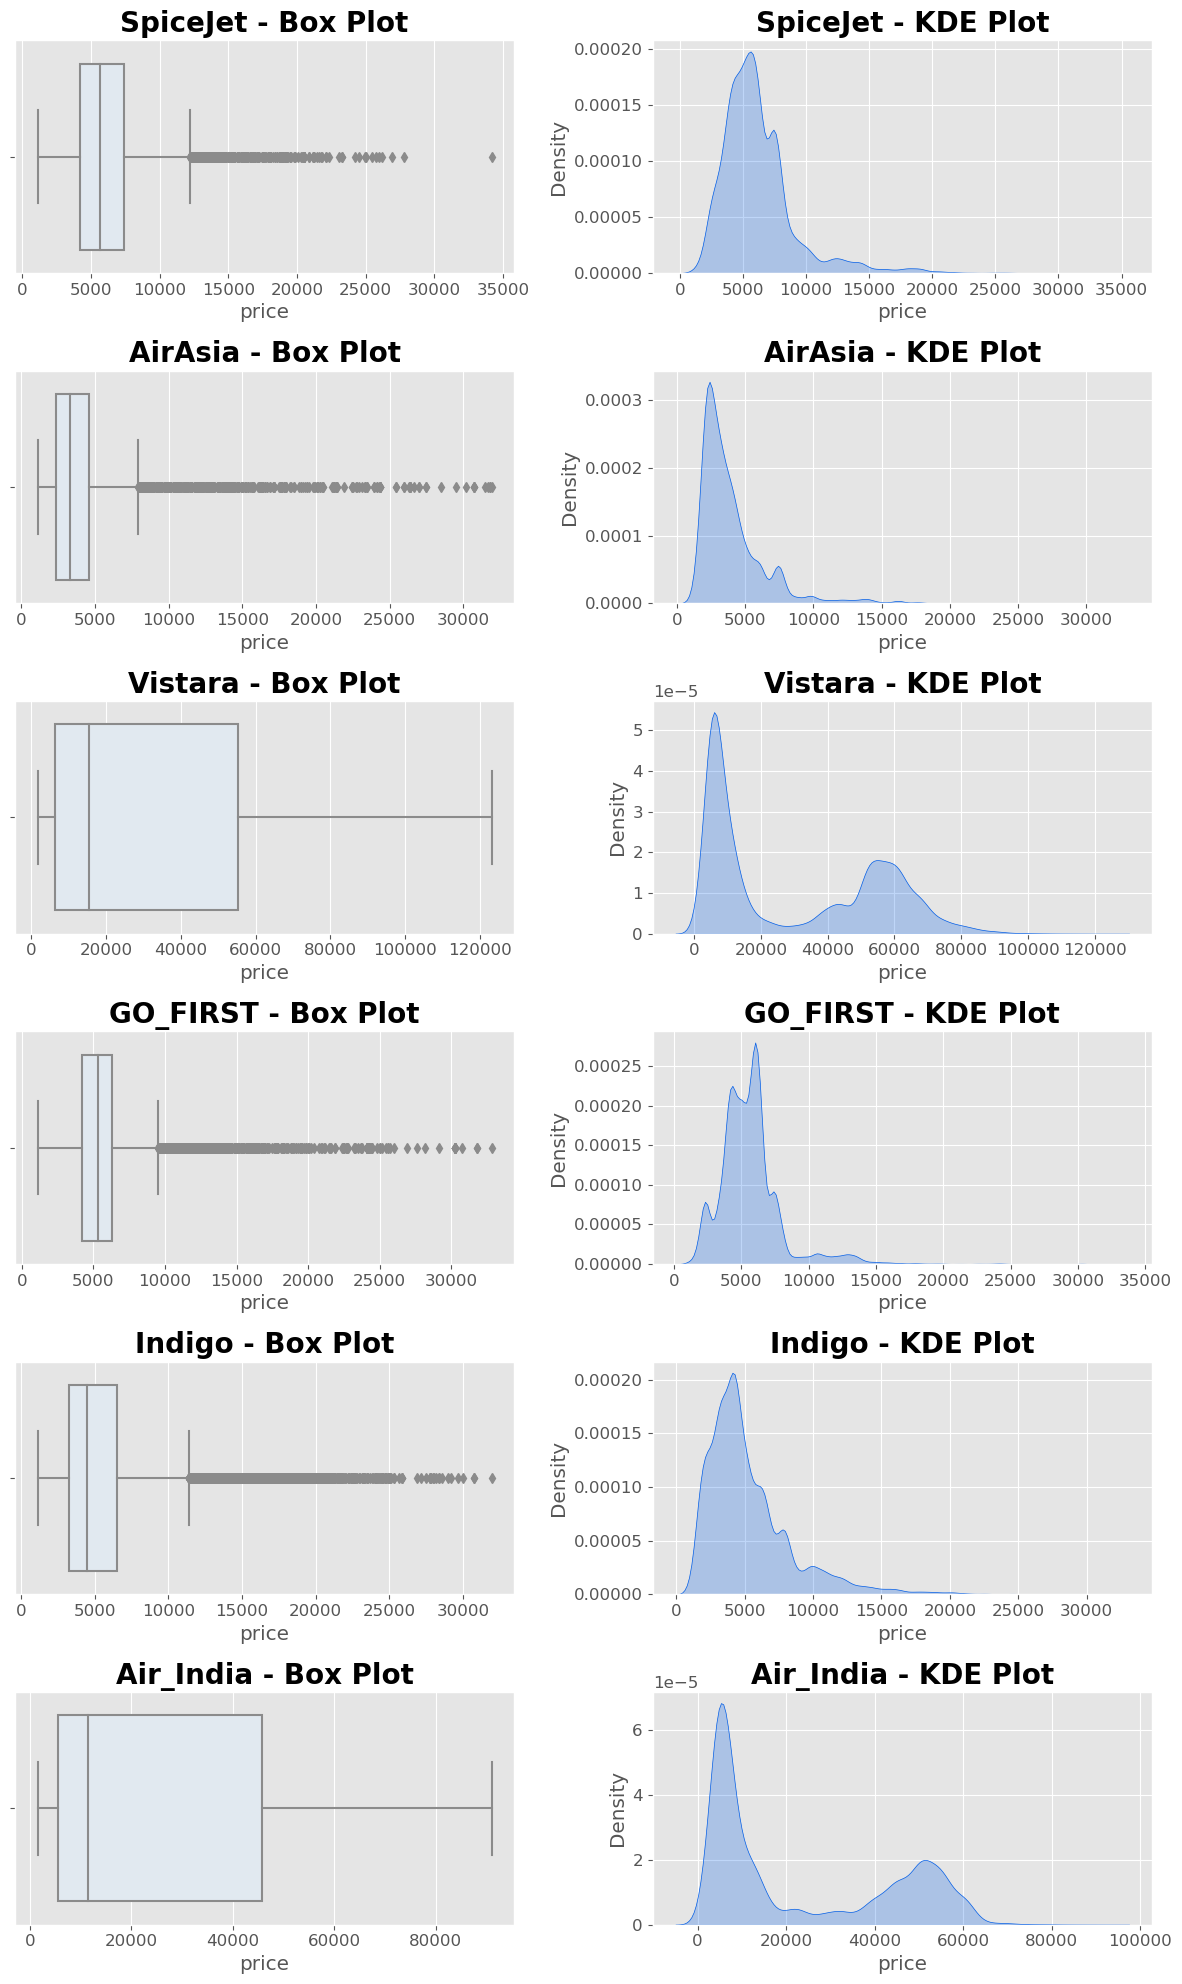

In [7]:
# Create a 6x2 matrix of subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 20))

# Create a dictionary to store airline data
airline_dict = {}

airlines = df['airline'].unique()

for airline_name in airlines:
    airline_dict[airline_name] = df[df['airline'] == airline_name]['price']

def price_airline(name, color_box, color_kde, ax_box, ax_kde):
    sns.boxplot(x='price', data=df[df['airline'] == name], ax=ax_box, color=color_box)
    ax_box.set_title(f"{name} - Box Plot", fontweight='bold')
    
    sns.kdeplot(airline_dict[name], fill=True, color=color_kde, ax=ax_kde)
    ax_kde.set_title(f"{name} - KDE Plot", fontweight='bold')

# Iterate through the airlines and plot them in the matrix of subplots
row = 0
for airline_name in airlines:
    price_airline(airline_name, '#DEE9F3', '#005CE6', axes[row, 0], axes[row, 1])
    row += 1

plt.tight_layout()
plt.show()


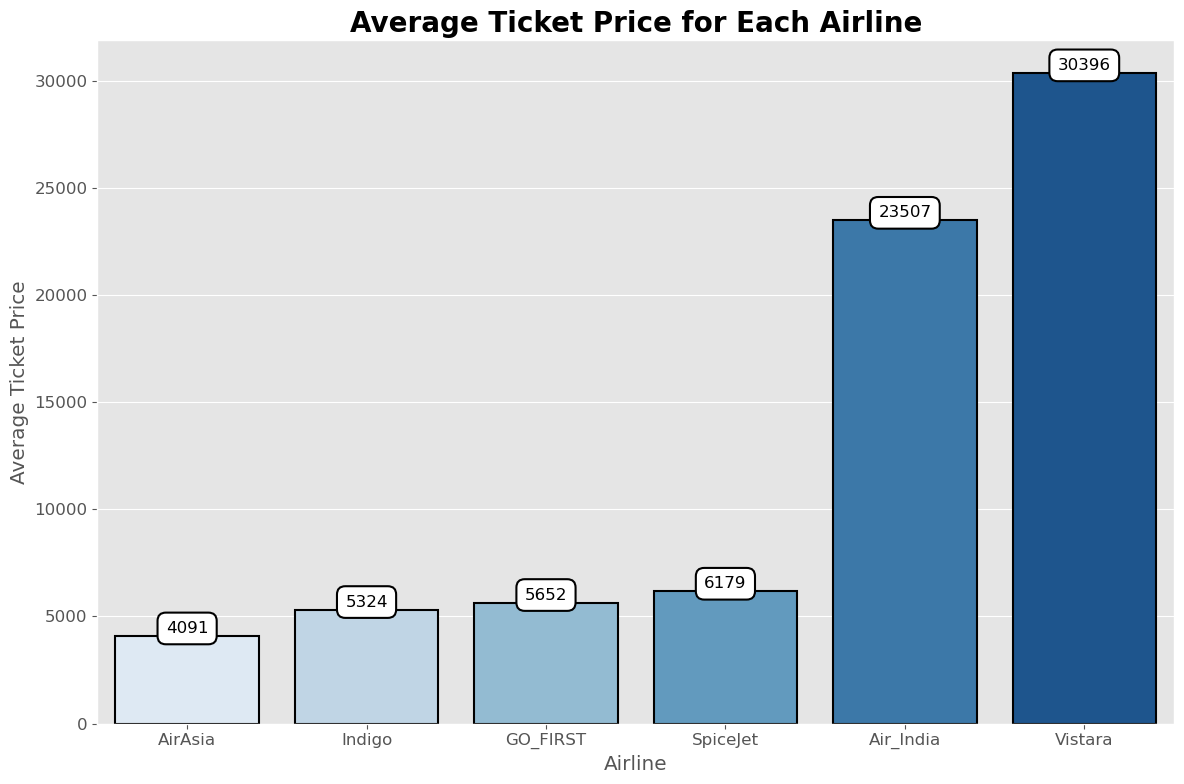

In [8]:
# Calculate the mean ticket price for each airline
airline_group = df.groupby('airline')['price'].mean().reset_index()
airline_group['mean_price'] = airline_group['price'].astype(int)

# Sort the airlines by mean ticket price in ascending order
airline_group = airline_group.sort_values(by='mean_price')

# Use a Seaborn palette with different shades of blue
palette = sns.color_palette('Blues', n_colors=len(airline_group))

# Create the bar plot with varying colors
plt.figure(figsize=(12, 8))
p1 = sns.barplot(data=airline_group, x='airline', y='mean_price', palette=palette, linewidth=1.5, edgecolor='black')
p1.bar_label(p1.containers[0], bbox=bbox)

# Set plot title, labels, and tick rotation
plt.title('Average Ticket Price for Each Airline', fontweight='bold')
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')

plt.tight_layout()
plt.show()

**Out of all the airlines, `Vistara` and `Air India` offer the most expensive tickets, with Vistara taking the lead. However, if you're looking for more budget-friendly options, `AirAsia` provides the cheapest tickets among all the airlines.**

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

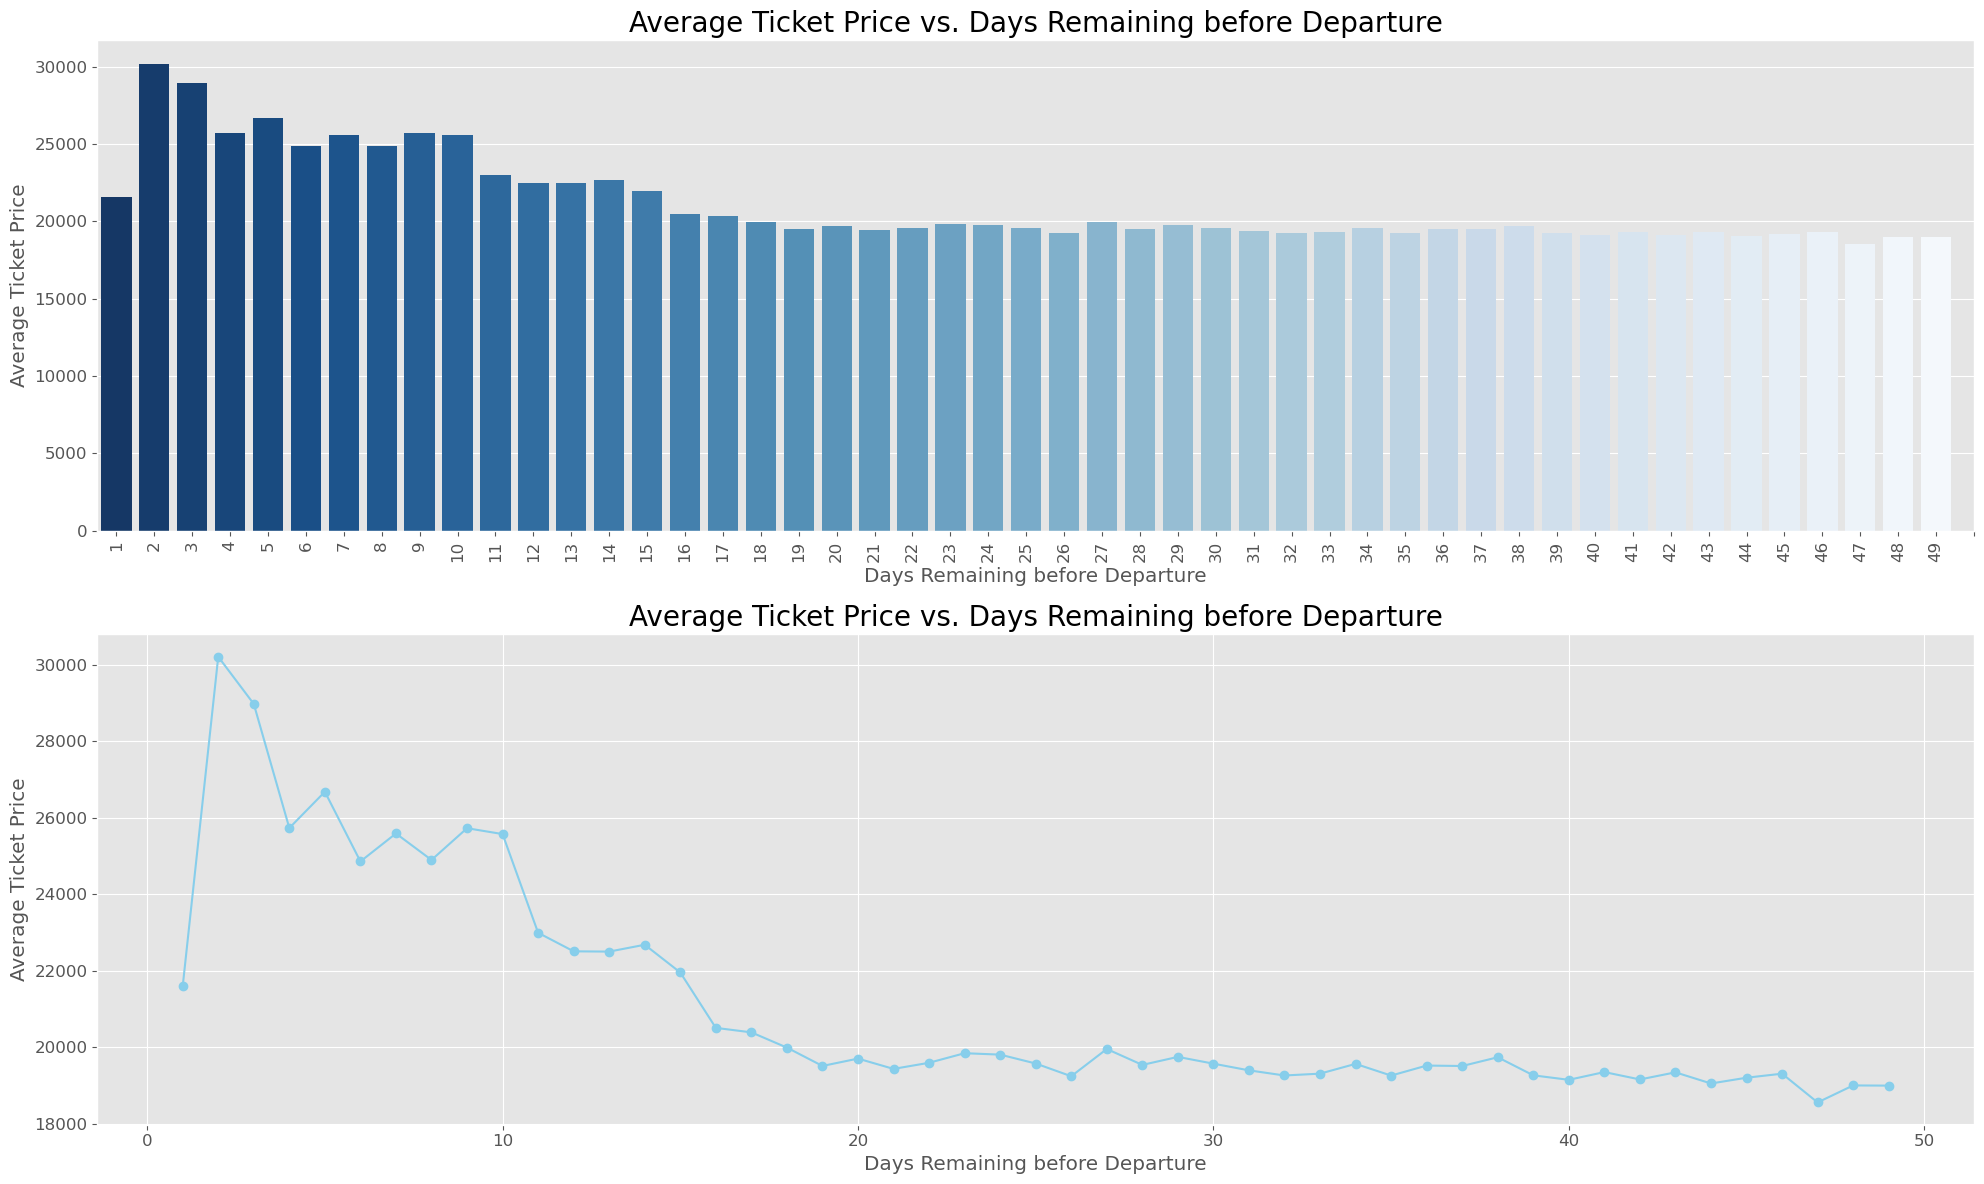

In [9]:
# Create a 2x1 matrix of subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Group the data by 'days_left' and calculate the average ticket price for each group
average_prices = df.groupby('days_left')['price'].mean().reset_index()

# Subplot 1: Barplot using Seaborn
palette = 'Blues_r'
sns.barplot(x='days_left', y='price', data=average_prices, palette=palette, ax=axes[0])
axes[0].set_xlabel('Days Remaining before Departure')
axes[0].set_ylabel('Average Ticket Price')
axes[0].set_title('Average Ticket Price vs. Days Remaining before Departure')
axes[0].set_xticks(range(0, 50, 1))
axes[0].tick_params(axis='x', rotation=90)

# Subplot 2: Line plot using Matplotlib
sky_color = '#87CEEB'  # Light blue color for the sky
axes[1].plot(average_prices['days_left'], average_prices['price'], marker='o', color=sky_color)
axes[1].set_xlabel('Days Remaining before Departure')
axes[1].set_ylabel('Average Ticket Price')
axes[1].set_title('Average Ticket Price vs. Days Remaining before Departure')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Ticket prices for a flight follow a uniform distribution between the `18th and 49th` day before departure. 
However, the most expensive tickets are found closer to the departure date, with the `highest price` being charged `just two days` before the flight. This means that as the departure day approaches, ticket prices increase significantly, making last-minute bookings much more costly. It's essential for travelers to be aware of this price trend and plan accordingly to avoid paying a premium for their flights.
However, there is a twist: if you book `just one day` before the flight, `you can get a cheaper ticket` than if you book two days before the flight. This could be because the airlines may hold some of the cheapest tickets until the last day, resulting in limited choices for travelers. So, for those willing to take the risk and wait until the last minute, there's a potential opportunity to snag a better deal.**

### How does the price change depending on the departure time?

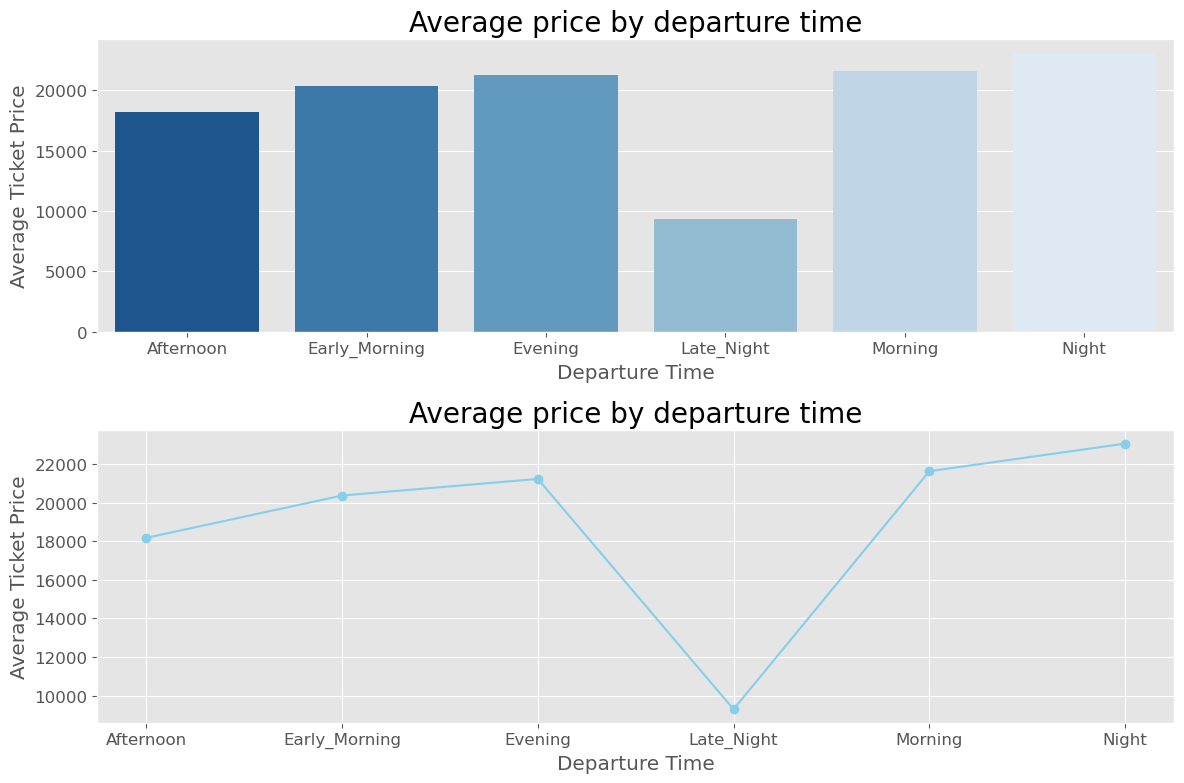

In [10]:
# Create a 2x1 matrix of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Group the data by 'departure_time' and calculate the average ticket price for each group
average_prices = df.groupby('departure_time')['price'].mean().reset_index()

# Subplot 1: Barplot using Seaborn
palette = 'Blues_r'
sns.barplot(x='departure_time', y='price', data=average_prices, palette=palette, ax=axes[0])
axes[0].set_xlabel('Departure Time')
axes[0].set_ylabel('Average Ticket Price')
axes[0].set_title('Average price by departure time')

# Subplot 2: Line plot using Matplotlib
sky_color = '#87CEEB'  # Light blue color for the sky
axes[1].plot(average_prices['departure_time'], average_prices['price'], marker='o', color=sky_color)
axes[1].set_xlabel('Departure Time')
axes[1].set_ylabel('Average Ticket Price')
axes[1].set_title('Average price by departure time')
axes[1].grid(True)

plt.tight_layout()
plt.show()



**This reveals intriguing patterns in the cost distribution across different time periods. Morning emerges as the most expensive, reflecting potentially higher demand or premium services during those hours. Following closely behind is the Evening, suggesting a continuation of elevated prices during peak times. Early Morning secures the third position, indicating that the cost gradually decreases as the day progresses. Afternoon appears as a more budget-friendly option compared to the previous three. Night ranks second to last in terms of cost, signaling a dip in pricing during late hours. Finally, Late Night proves to be the most economical choice among all the time periods, offering the best value for those seeking cost-effective options.**

### How does the price change depending on the arrival time?

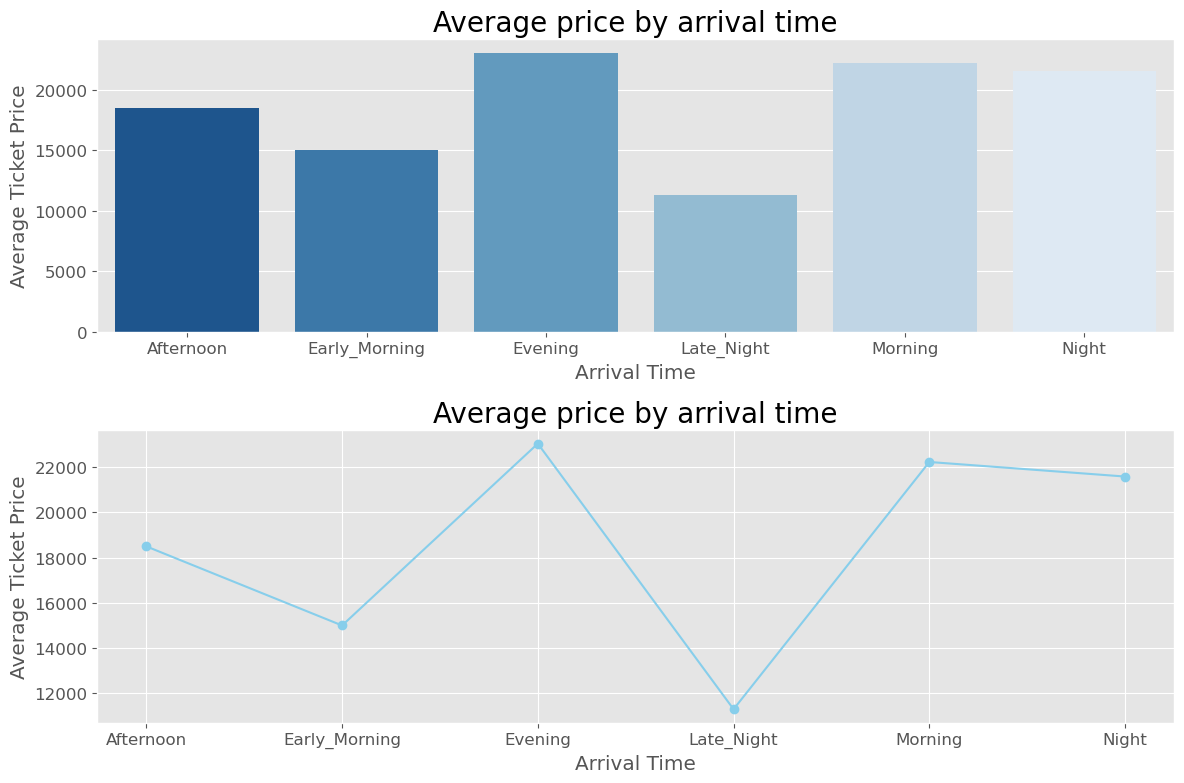

In [11]:
# Create a 2x1 matrix of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Group the data by 'days_left' and calculate the average ticket price for each group
average_prices = df.groupby('arrival_time')['price'].mean().reset_index()

# Subplot 1: Barplot using Seaborn
palette = 'Blues_r'
sns.barplot(x='arrival_time', y='price', data=average_prices, palette=palette, ax=axes[0])
axes[0].set_xlabel('Arrival Time')
axes[0].set_ylabel('Average Ticket Price')
axes[0].set_title('Average price by arrival time')

# Subplot 2: Line plot using Matplotlib
sky_color = '#87CEEB'  # Light blue color for the sky
axes[1].plot(average_prices['arrival_time'], average_prices['price'], marker='o', color=sky_color)
axes[1].set_xlabel('Arrival Time')
axes[1].set_ylabel('Average Ticket Price')
axes[1].set_title('Average price by arrival time')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Evening stands out as the most expensive, offering premium-priced services during peak hours. Morning closely follows as the second most costly option, while Early Morning ranks third in terms of pricing. Afternoon comes in as a mid-range choice, offering more budget-friendly rates compared to the top three. Night and Late Night prove to be the most economical options, providing cost-effective solutions for those seeking affordable prices.**

### Does ticket price change based on the departure time and arrival time?

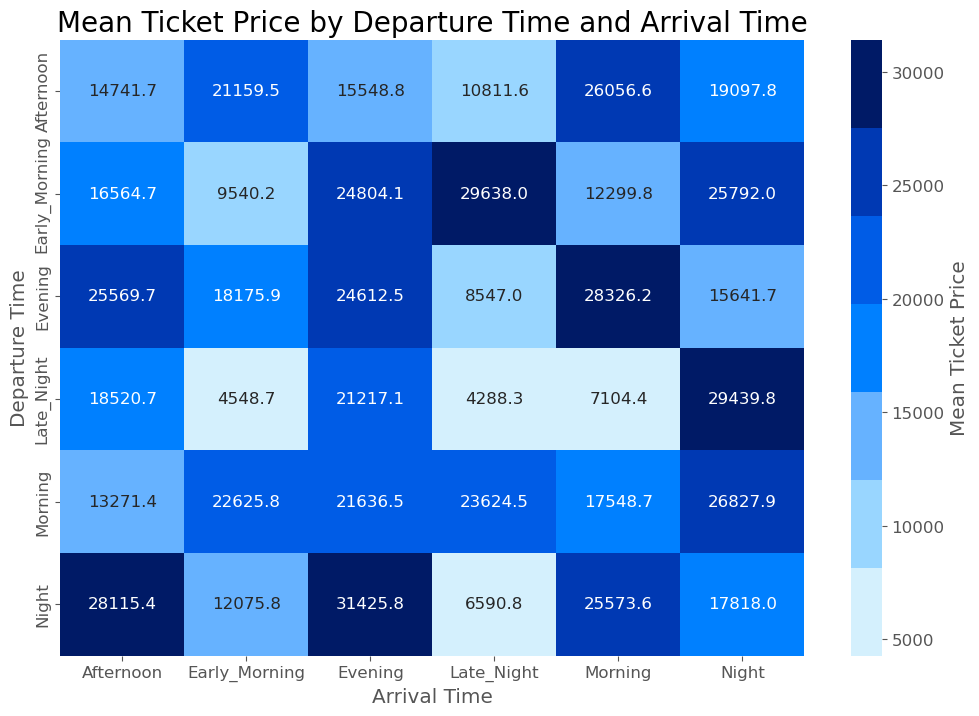

In [12]:
# Create a pivot table to aggregate the mean ticket price for each combination of departure and arrival times
pivot_table = df.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='mean')

# Define a custom color palette that resembles the colors of the sky
colors = ["#D4F0FD", "#99D6FF", "#66B2FF", "#0080FF", "#005CE6", "#0039B3", "#001A66"]

# Create a heatmap with the custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap=sns.color_palette(colors), annot=True, fmt=".1f", cbar_kws={'label': 'Mean Ticket Price'})
plt.title('Mean Ticket Price by Departure Time and Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')
plt.show()


### How does the price change depending on the Source City?

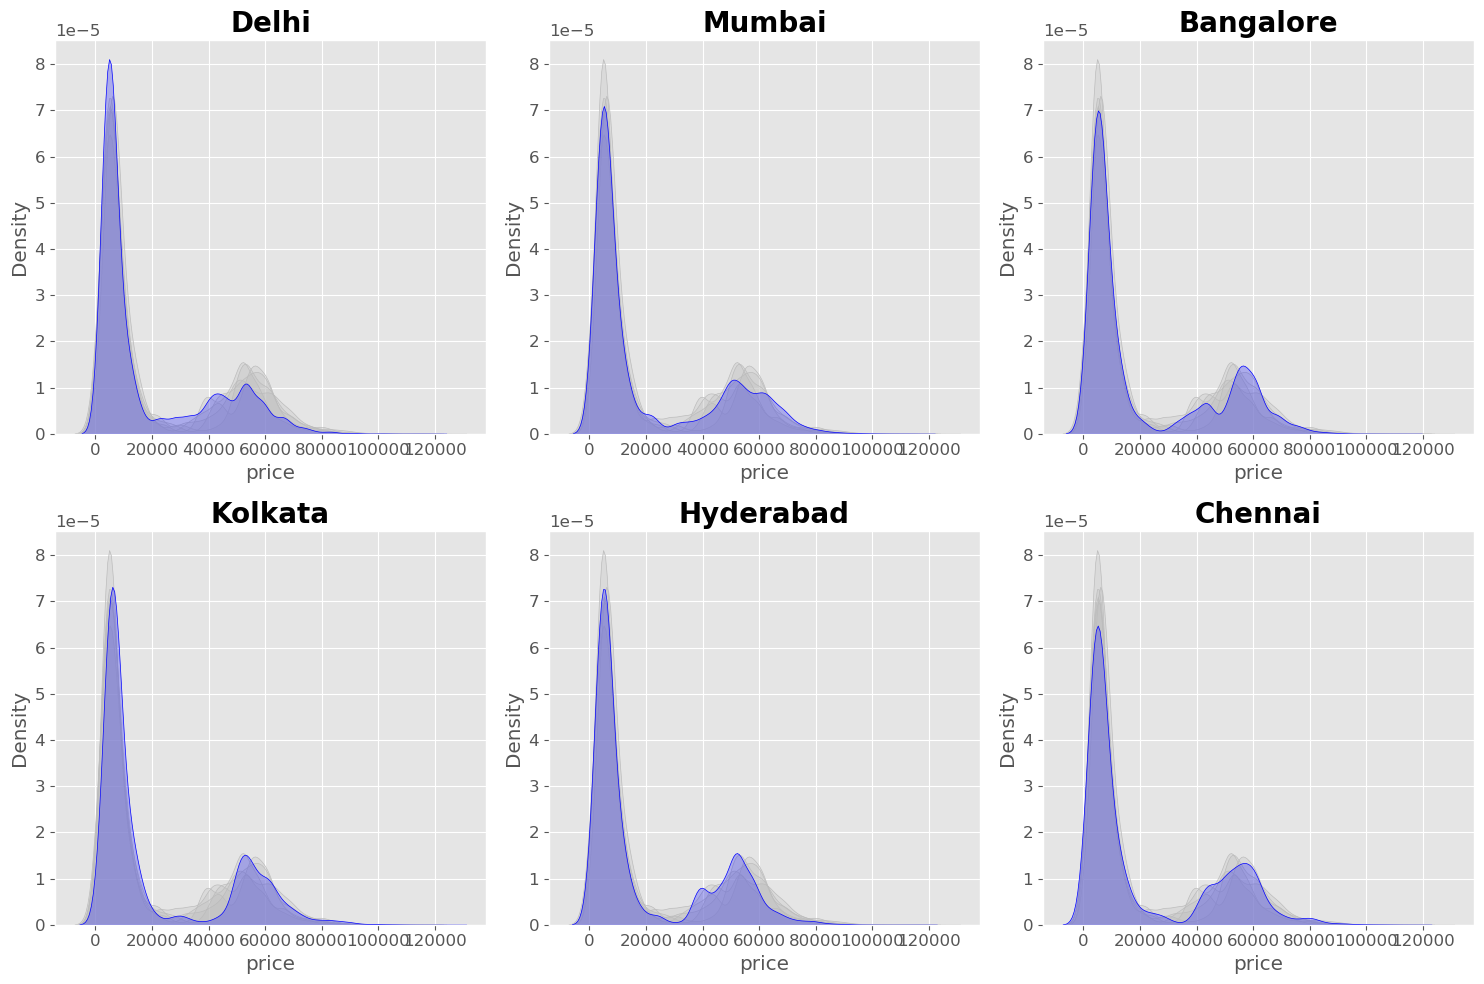

In [13]:
# Create a 2x3 matrix of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create a dictionary to store airline data
source_city_dict = {}

source_city = df['source_city'].unique()

for source_city_name in source_city:
    source_city_dict[source_city_name] = df[df['source_city'] == source_city_name]['price']

def price_airline(name, color, ax):
    source_city = df['source_city'].unique()
    
    for i in source_city:
        if str(i) != name:
            sns.kdeplot(source_city_dict[i], fill=True, color='#BCBCBC', ax=ax)
        
    sns.kdeplot(source_city_dict[name], fill=True, color=color, ax=ax)
    ax.set_title(name, fontweight='bold')

# Iterate through the airlines and plot them in the matrix of subplots
row = 0
col = 0
for source_city_name in source_city:
    price_airline(source_city_name, 'blue', axes[row, col])
    col += 1
    if col == 3:
        col = 0
        row += 1

plt.tight_layout()
plt.show()

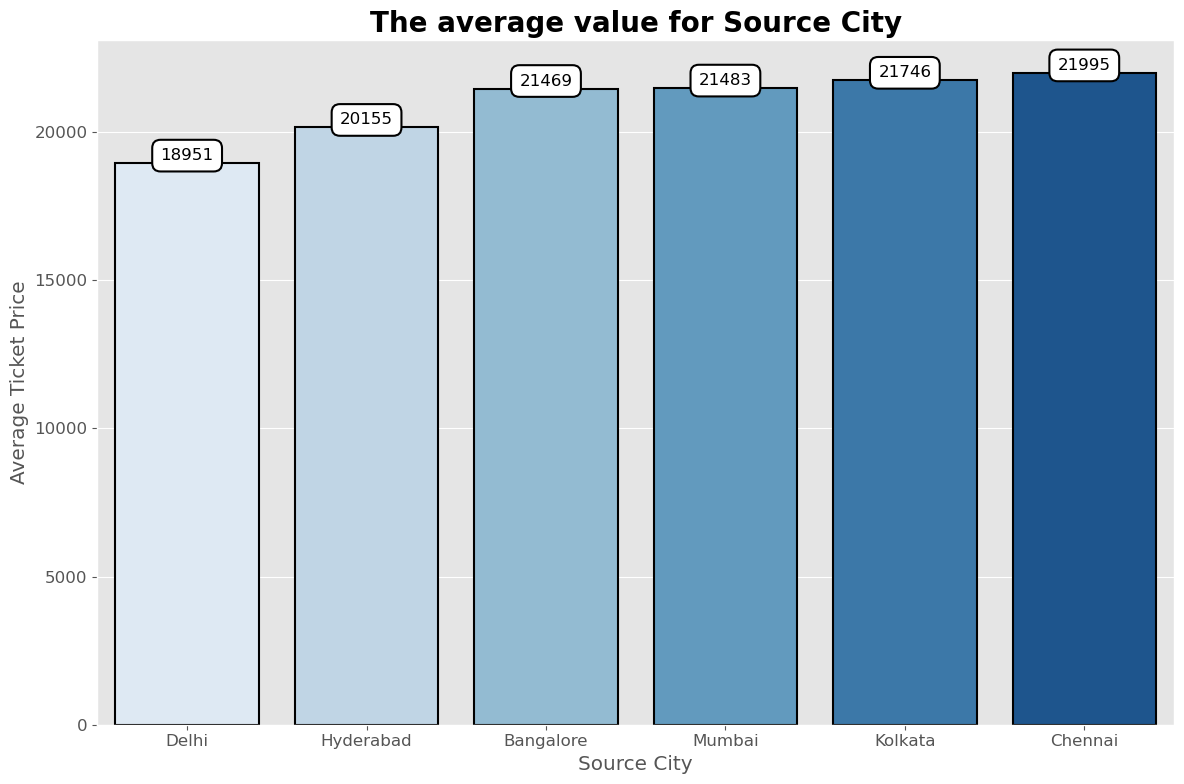

In [14]:
# Calculate the mean ticket price for each airline
airline_group = df.groupby('source_city')['price'].mean().reset_index()
airline_group['mean_price'] = airline_group['price'].astype(int)

# Sort the airlines by mean ticket price in ascending order
airline_group = airline_group.sort_values(by='mean_price')

# Use a Seaborn palette with different shades of blue
palette = sns.color_palette('Blues', n_colors=len(airline_group))

# Create the bar plot with varying colors
plt.figure(figsize=(12, 8))
p1 = sns.barplot(data=airline_group, x='source_city', y='mean_price', palette=palette, linewidth=1.5, edgecolor='black')
p1.bar_label(p1.containers[0], bbox=bbox)

# Set plot title, labels, and tick rotation
plt.title('The average value for Source City', fontweight='bold')
plt.xlabel('Source City')
plt.ylabel('Average Ticket Price')

plt.tight_layout()
plt.show()

**Flight prices show a consistent distribution across different departure cities.
There is a mix of cheap and expensive tickets, possibly due to imbalanced aircraft class offerings, with business class tickets being more expensive and standard/economy tickets being more affordable.
Delphi offers the cheapest flight tickets among the listed departure cities.
Chennai stands out as the city with the highest-priced flight tickets.
Bangalore, Mumbai, Kolkata, and Chennai display a relatively even distribution of ticket prices between them.**

### How does the ticket price change depending on the passenger class?

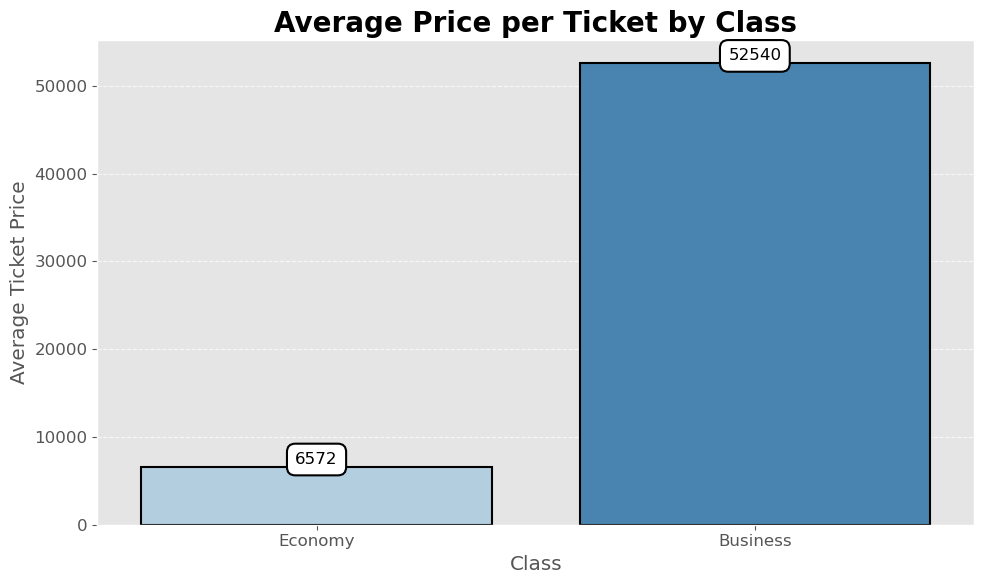

In [15]:
# Group the data by 'class' and calculate the mean ticket price for each class
class_group = df.groupby('class')['price'].mean().reset_index()
class_group['mean_price'] = class_group['price'].astype(int)
class_group = class_group.sort_values(by='mean_price')

# Create a bar plot with varying colors
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Blues', n_colors=len(class_group))
p1 = sns.barplot(data=class_group, x='class', y='mean_price', palette=palette, linewidth=1.5, edgecolor='black')
p1.bar_label(p1.containers[0], bbox=bbox)

# Set plot title and labels
plt.title('Average Price per Ticket by Class', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Average Ticket Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



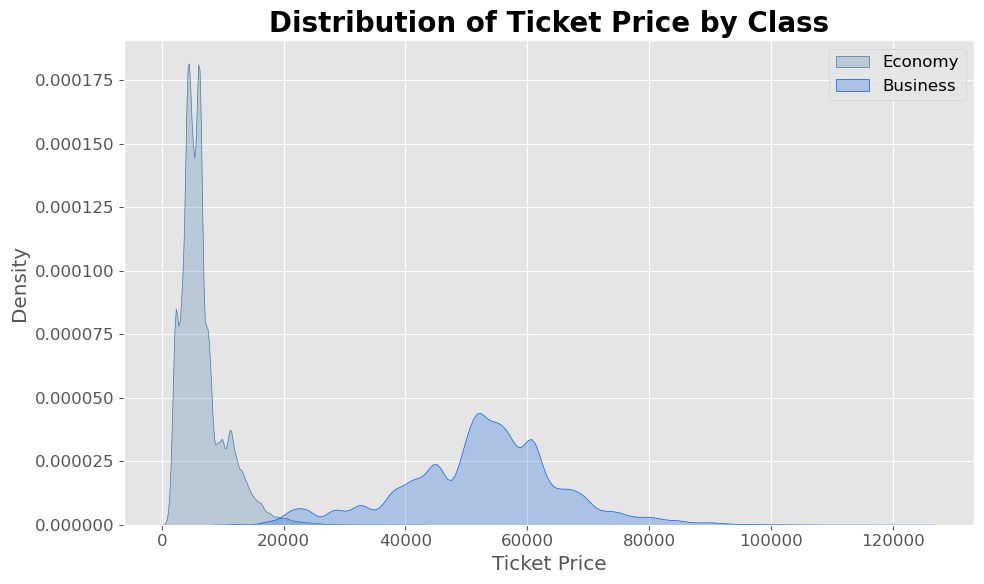

In [16]:

# Create a dictionary to store class data
class_dict = {}

clas = df['class'].unique()

for class_name in clas:
    class_dict[class_name] = df[df['class'] == class_name]['price']

# Create the KDE plot with the specified colors and add labels
plt.figure(figsize=(10, 6))
sns.kdeplot(x=class_dict['Economy'], fill=True, label='Economy', color='#3C78A8')
sns.kdeplot(x=class_dict['Business'], fill=True, label='Business', color='#005CE6')

# Set plot title and labels
plt.title('Distribution of Ticket Price by Class', fontweight='bold')
plt.xlabel('Ticket Price')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


1. Ticket prices strongly correlate with the passenger's class.
2. Business class tickets have significantly higher prices compared to economy class tickets.
3. Economy class tickets, on average, cost around 6579.
4. In contrast, the average price for a business class ticket is substantially higher, around 52552.
5. These findings highlight distinct price disparities between the two passenger classes, indicating their significant impact on ticket pricing.

### How does the ticket price change depending on Stops?

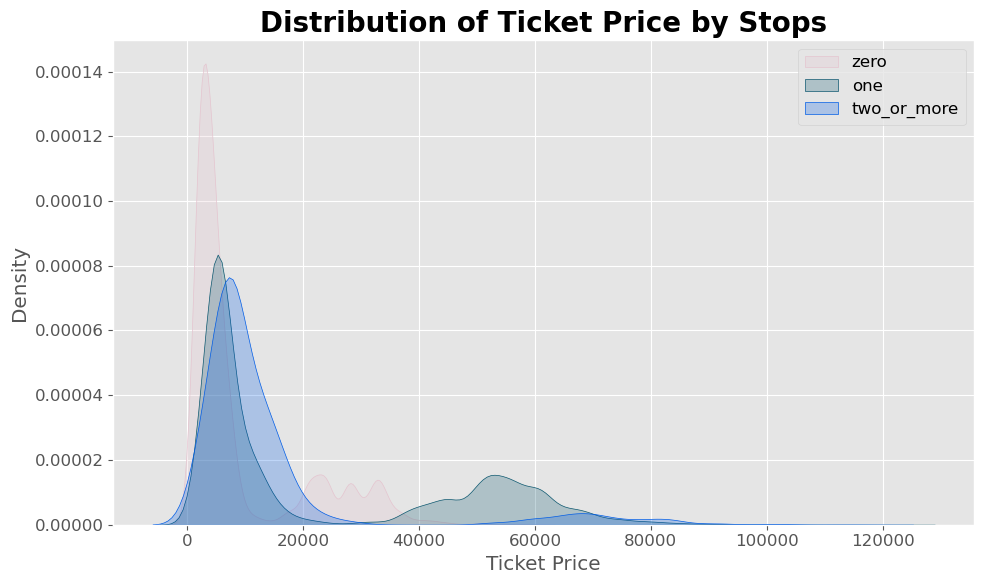

In [17]:
# Create a dictionary to store stops data
stops_dict = {}

stops = df['stops'].unique()

for stops_name in stops:
    stops_dict[stops_name] = df[df['stops'] == stops_name]['price']

# Create a custom color palette with varying shades of blue
num_stops = len(stops_dict)
sky_palette = sns.color_palette(['#E4C4CF', '#0A566E', '#005CE6'], n_colors=num_stops)

# Create the KDE plot with the custom color palette and add labels
plt.figure(figsize=(10, 6))
for stops_name, color in zip(stops_dict.keys(), sky_palette):
    sns.kdeplot(x=stops_dict[stops_name], fill=True, label=stops_name, color=color)

# Set plot title and labels
plt.title('Distribution of Ticket Price by Stops', fontweight='bold')
plt.xlabel('Ticket Price')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


**Direct flights offer the cheapest tickets among all the options.
Flights with one transfer have the most expensive tickets.
For flights with more than two transfers, the tickets remain consistently affordable, even when compared to single-stop or non-stop flights.**

<a id=1></a>
<h1 style="color:#619DBF">Conclusions</h1>

**In conclusion, the analysis reveals intriguing patterns in flight ticket prices based on various factors such as the airline, time of booking, time of departure, departure city, and the number of transfers. Vistara and Air India offer the most expensive tickets, with Vistara leading the way, while AirAsia provides the cheapest options. Ticket prices follow a uniform distribution between the 18th and 49th day before departure, but the most expensive tickets are found closer to the departure date, with the highest price charged just two days before the flight.**

**There is a potential opportunity for budget-conscious travelers to get a better deal by booking just one day before the flight rather than two days before. The time of departure also plays a role in ticket prices, with Morning and Evening flights being the most expensive, and Late Night being the most economical choice.**

**Moreover, the class of the passenger significantly impacts ticket prices, with Business class tickets being substantially more expensive than Economy class tickets. Direct flights offer the cheapest tickets, while flights with one transfer are the most expensive.**

**Overall, understanding these patterns can help travelers make more informed decisions and plan their trips more effectively, potentially saving money by taking advantage of the best time to book and the most cost-effective flight options.**